# **Decision Tree**

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 43.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=37bbf978292e948af628a8df5962d95f8ec25132ea1b8da0b83deb6f334d9b3f
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
import shap


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
col_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
heart = pd.read_csv("heart.csv", header=0, names=col_names)
print(heart.head())

   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1                0                     125          212   
1   53    1                0                     140          203   
2   70    1                0                     145          174   
3   61    1                0                     148          203   
4   62    0                0                     138          294   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    0         1                      168   
1                    1         0                      155   
2                    0         1                      125   
3                    0         1                      161   
4                    1         1                      106   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            1.0         2                  2   
1                        1            3.1         0                  0

In [ ]:
print(heart.groupby('target').count())
print(heart.info())

feature_cols = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
X = heart[feature_cols]
y = heart.target

        age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
target                                                                   
0       499  499              499                     499          499   
1       526  526              526                     526          526   

        fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
target                                                           
0                       499       499                      499   
1                       526       526                      526   

        exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
target                                                                        
0                           499            499       499                499   
1                           526            526       526                526   

        thalassemia  
target               
0               499  
1               526  
<class 'pandas.core.frame.DataFra

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('train size is %i'%y_train.shape[0])
print('test size is %i'%y_test.shape[0])

train size is 717
test size is 308


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explains_variance = pca.explained_variance_ratio_
print(explains_variance)

[0.21420857 0.11816705 0.09353977 0.08967517 0.07990573 0.07593681
 0.06680541 0.05930176 0.05467603 0.04774024 0.03915138 0.03225474
 0.02863733]


In [ ]:
#pca = PCA(n_components = 2)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explains_variance = pca.explained_variance_ratio_
#print(explains_variance)


In [ ]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1
 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 0 1 1 0]


In [ ]:
print('Train accuracy {:.2f}%'.format(classifier.score(X_train,y_train)*100))

Train accuracy 82.98%


In [ ]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 79.87%


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
report=metrics.classification_report(y_test,y_pred)
clf_name=['Decision Tree Heart Disease','RegLog']
print('Reporting for %s:'%clf_name)
print(report)

Accuracy: 0.7987012987012987
Reporting for ['Decision Tree Heart Disease', 'RegLog']:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       161
           1       0.85      0.70      0.77       147

    accuracy                           0.80       308
   macro avg       0.81      0.79      0.80       308
weighted avg       0.81      0.80      0.80       308



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[143  18]
 [ 44 103]]


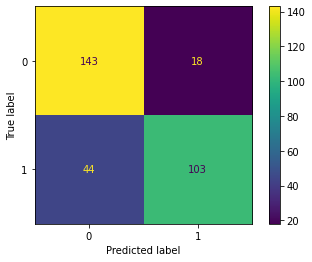

In [ ]:
cm1 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
explainer = shap.TreeExplainer(classifier)
shap_values_DT = explainer.shap_values(X_test)

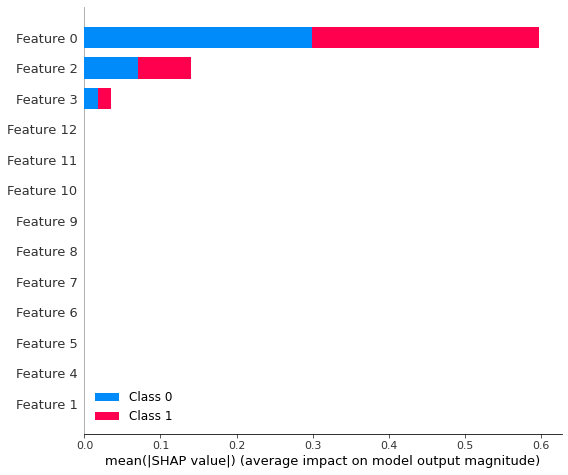

In [ ]:
shap.summary_plot(shap_values_DT, X_test)

0.7944395149364094


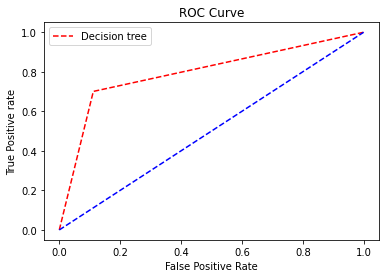

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_pred[:], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, y_pred[:])
print(auc_score)

plt.plot(fpr, tpr, linestyle= '--', color='red', label='Decision tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
print(heart.std())

age                         9.072290
sex                         0.460373
chest_pain_type             1.029641
resting_blood_pressure     17.516718
cholesterol                51.592510
fasting_blood_sugar         0.356527
rest_ecg                    0.527878
max_heart_rate_achieved    23.005724
exercise_induced_angina     0.472772
st_depression               1.175053
st_slope                    0.617755
num_major_vessels           1.030798
thalassemia                 0.620660
target                      0.500070
dtype: float64


In [ ]:
X_test = np.array(X_test)
print(type(X_test))
print(X_test)
df_X_test = pd.DataFrame(X_test, columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia'])

<class 'numpy.ndarray'>
[[ 1.09971479 -0.30648945 -1.75226958 ...  0.01404383 -1.5050328
  -0.23161914]
 [-1.58467923  1.05294356  0.74481254 ...  0.91255605  0.23117466
  -0.73573429]
 [-2.11471754 -0.58941429 -0.24941958 ... -0.45891925  0.61253567
  -0.28794255]
 ...
 [-0.61926735  1.66069598  1.05062522 ...  0.47230333  0.4427363
  -0.43097688]
 [-2.06659665 -0.83046267 -0.46924805 ... -1.00999139  0.40340729
  -0.05666317]
 [-0.9634919  -1.70779893 -1.00002795 ...  1.63605935 -0.94181868
   0.45999527]]


In [ ]:
perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)
eli5.explain_weights(perm, feature_names = df_X_test.columns.tolist())

Weight,Feature
0.2571 ± 0.0433,age
0.0513 ± 0.0166,chest_pain_type
0.0149 ± 0.0032,resting_blood_pressure
0 ± 0.0000,thalassemia
0 ± 0.0000,num_major_vessels
0 ± 0.0000,st_slope
0 ± 0.0000,st_depression
0 ± 0.0000,exercise_induced_angina
0 ± 0.0000,max_heart_rate_achieved
0 ± 0.0000,rest_ecg


In [ ]:
eli5.explain_weights(classifier)


Weight,Feature
0.8096,x0
0.1108,x2
0.0797,x3
0,x12
0,x11
0,x10
0,x9
0,x8
0,x7
0,x6


In [ ]:
eli5.explain_prediction(classifier, np.array(X_test)[1])

eli5.show_prediction(classifier, df_X_test.iloc[200], feature_names=df_X_test.columns.tolist(), show_feature_values=True)

X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names


# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
classifier_svm = SVC(random_state=0, kernel='linear',decision_function_shape='ovo')

classifier_svm.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = classifier_svm.predict(X_test)

In [ ]:
print('Train accuracy {:.2f}%'.format(classifier_svm.score(X_train,y_train)*100))

Train accuracy 85.36%


In [ ]:
print('Test accuracy {:.2f}%'.format(classifier_svm.score(X_test,y_test)*100))

Test accuracy 81.82%


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
report=metrics.classification_report(y_test,y_pred1)
clf_name=['SVM','RegLog']
print('Reporting for %s:'%clf_name)
print(report)

Accuracy: 0.8181818181818182
Reporting for ['SVM', 'RegLog']:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81       161
           1       0.75      0.93      0.83       147

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.84      0.82      0.82       308



In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred1)
print(cm2)

[[116  45]
 [ 11 136]]


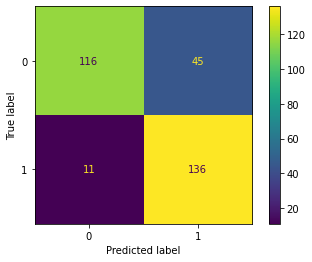

In [ ]:
cm2 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.show()

0.8228334812185745


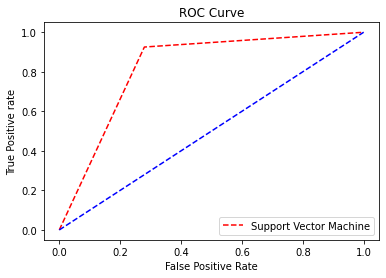

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_pred1[:], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, y_pred1[:])
print(auc_score)

plt.plot(fpr, tpr, linestyle= '--', color='red', label='Support Vector Machine')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
X_test = np.array(X_test)
print(type(X_test))
print(X_test)
df_X_test = pd.DataFrame(X_test, columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia'])

<class 'numpy.ndarray'>
[[ 1.09971479 -0.30648945 -1.75226958 ...  0.01404383 -1.5050328
  -0.23161914]
 [-1.58467923  1.05294356  0.74481254 ...  0.91255605  0.23117466
  -0.73573429]
 [-2.11471754 -0.58941429 -0.24941958 ... -0.45891925  0.61253567
  -0.28794255]
 ...
 [-0.61926735  1.66069598  1.05062522 ...  0.47230333  0.4427363
  -0.43097688]
 [-2.06659665 -0.83046267 -0.46924805 ... -1.00999139  0.40340729
  -0.05666317]
 [-0.9634919  -1.70779893 -1.00002795 ...  1.63605935 -0.94181868
   0.45999527]]


In [ ]:
perm = PermutationImportance(classifier_svm, random_state=1).fit(X_test, y_test)
eli5.explain_weights(perm, feature_names = df_X_test.columns.tolist())

Weight,Feature
0.2740 ± 0.0252,age
0.0253 ± 0.0095,chest_pain_type
0.0123 ± 0.0254,sex
0.0104 ± 0.0076,rest_ecg
0.0084 ± 0.0134,st_depression
0.0084 ± 0.0097,fasting_blood_sugar
0.0078 ± 0.0097,thalassemia
0.0071 ± 0.0049,cholesterol
0.0052 ± 0.0120,exercise_induced_angina
0.0013 ± 0.0052,num_major_vessels


In [ ]:
eli5.explain_weights(classifier_svm)

Weight?,Feature
+0.511,x2
+0.345,x1
+0.245,x3
+0.212,x10
+0.212,x12
+0.104,x5
+0.081,<BIAS>
+0.033,x4
-0.009,x7
-0.074,x6


In [ ]:
eli5.explain_prediction(classifier_svm, np.array(X_test)[1])

eli5.show_prediction(classifier_svm, df_X_test.iloc[20], feature_names=list(X.columns), show_feature_values=True)

X has feature names, but SVC was fitted without feature names


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred2=clf.predict(X_test)

In [ ]:
print('Train accuracy {:.2f}%'.format(clf.score(X_train,y_train)*100))

Train accuracy 100.00%


In [ ]:
print('Test accuracy {:.2f}%'.format(clf.score(X_test,y_test)*100))

Test accuracy 98.70%


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.987012987012987


In [ ]:
report=metrics.classification_report(y_test,y_pred2)
clf_name_rf=['Random Forest Heart Disease','RegLog']
print('Reporting for %s:'%clf_name_rf)
print(report)

Reporting for ['Random Forest Heart Disease', 'RegLog']:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.97      1.00      0.99       147

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[157   4]
 [  0 147]]


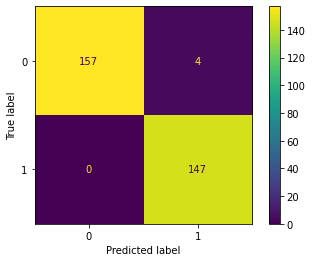

In [ ]:
cm2 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

In [ ]:
explainer2 = shap.TreeExplainer(clf)
shap_values_RF = explainer.shap_values(X_test)

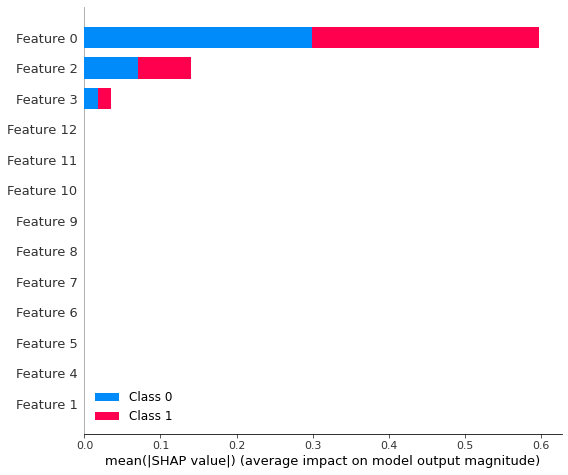

In [ ]:
shap.summary_plot(shap_values_RF, X_test)

0.9875776397515528


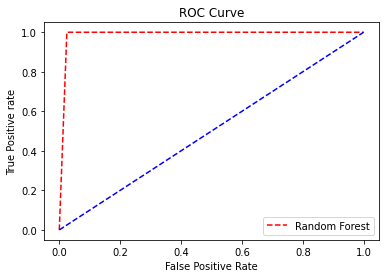

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, y_pred2[:], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score = roc_auc_score(y_test, y_pred2[:])
print(auc_score)

plt.plot(fpr, tpr, linestyle= '--', color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
perm = PermutationImportance(clf, random_state=1).fit(X_test, y_test)
eli5.explain_weights(perm, feature_names = df_X_test.columns.tolist())

Weight,Feature
0.2786 ± 0.0311,age
0.0357 ± 0.0179,chest_pain_type
0.0130 ± 0.0058,fasting_blood_sugar
0.0052 ± 0.0052,exercise_induced_angina
0.0039 ± 0.0064,max_heart_rate_achieved
0.0039 ± 0.0064,resting_blood_pressure
0.0006 ± 0.0026,num_major_vessels
0.0006 ± 0.0026,rest_ecg
0 ± 0.0000,thalassemia
0 ± 0.0000,st_slope


In [ ]:
eli5.explain_weights(clf)

Weight,Feature
0.3657 ± 0.2435,x0
0.0768 ± 0.0713,x2
0.0670 ± 0.0691,x3
0.0633 ± 0.0737,x5
0.0565 ± 0.0640,x1
0.0554 ± 0.0649,x6
0.0488 ± 0.0693,x9
0.0484 ± 0.0588,x8
0.0456 ± 0.0675,x11
0.0456 ± 0.0634,x10


In [ ]:
eli5.explain_prediction(clf, np.array(X_test)[1])

eli5.show_prediction(clf, df_X_test.iloc[20], feature_names=list(X.columns), show_feature_values=True)

X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but DecisionTreeClassifier was fitted without feature names
X has feature names, but Dec